**Section 1. Data Input**

In [1]:
import pandas as pd
from google.colab import drive
import os
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')

# Set your working directory path
# base_path = "/content/drive/My_Drive/base_folder"
# Example: base_path = "/content/drive/My Drive/2024-2028 MIT PhD/Course Selection/20.440 BioNetworks/HW6"
base_path = "/content/drive/My Drive/2024-2028 MIT PhD/Course Selection/20.440 BioNetworks/HW6"
os.chdir(base_path)

Mounted at /content/drive


**Clean Test Dataset**

In [2]:
# Define subfolder and file name
subfolder = "Data"
filename = "Test_Dataset.xlsx"

# Construct full path using os.path.join
file_path = os.path.join(base_path, subfolder, filename)

In [3]:
# Load the Excel file
test_df = pd.read_excel(file_path)

# Clean data
clean_test_df = test_df.drop_duplicates(subset=["Sequence"], keep="first")

# # Construct full path using os.path.join
# clean_df_filename = "Deduplicated_Sequences.xlsx"
# clean_df_path = os.path.join(base_path, subfolder, clean_df_filename)

# # Save deduplicated data
# clean_test_df.to_excel(clean_df_path,
#                  sheet_name="Unique_Sequences",
#                  index=False)

# Extract peptides from the "Sequence" column into a list
test_pep_list = clean_test_df["Sequence"].tolist()

In [ ]:
# len(test_pep_list)

567

In [4]:
# The CD4 T cell prediction model (Model 1) doesn't take peptides smaller than 15 amino acids.
# 6 from the test set are filtered out
min_length = 15
filtered_test_pep_list = [pep for pep in test_pep_list if len(pep) >= min_length]

# Filter by length to fit the immunogenicity prediction model
filtered_test_df = clean_test_df[clean_test_df['Length'] >= 15].copy()

# Convert "N/A" strings to true NaN
filtered_test_df['Immunogenic Score'] = filtered_test_df['Immunogenic Score'].replace('N/A', np.nan)

# # Construct full path using os.path.join
# filtered_df_filename = "Filtered_Sequences.xlsx"
# filtered_df_path = os.path.join(base_path, subfolder, filtered_df_filename)

# # Save filtered data
# filtered_test_df.to_excel(filtered_df_path,
#                  index=False)

In [ ]:
# len(filtered_test_pep_list)

561

**Break Test Set and Training Sets Into Input Files of <= 1000 Sequences to Calculate Tm**

In [5]:
def process_peptide_batches_Tm(input_pep_list, batch_number=1, batch_size=1000, output_subfolder="Data"):
    """
    Processes peptide list in batches of 1000, saving each batch to a numbered file.
    Continues until all sequences are processed. Each peptide is prefixed with '>!'.

    Args:
        input_pep_list (list): List of peptide sequences to process
        batch_number (int): Starting number for batch files (default: 1)
        batch_size (int): Number of sequences per batch (default: 1000)
        output_subfolder (str): Subfolder to save batch files (default: "Data")

    Returns:
        int: Total number of batch files created
    """
    remaining_peptides = input_pep_list.copy()

    while len(remaining_peptides) > 0:
        # Take up to 1000 peptides
        current_batch = remaining_peptides[:batch_size]
        remaining_peptides = remaining_peptides[batch_size:]

        # Create filename with batch number
        filename = f"Tm_peptide_batch_{batch_number}.txt"
        output_path = os.path.join(base_path, output_subfolder, filename)

        # Save to file
        with open(output_path, 'w') as f:
            f.write('\n'.join([">!" + str(peptide) for peptide in current_batch]))

        batch_number += 1
    return batch_number

In [6]:
# Calculate Tm for Test Set
next_batch_number = process_peptide_batches_Tm(filtered_test_pep_list, batch_number=1) # total number of files

In [7]:
# Calculate Tm for Training Set (Model 1)
Model1_train_filename = "Model1_Train_Dataset.xlsx"
Model1_train_file_path = os.path.join(base_path, subfolder, Model1_train_filename)
Model1_train_df = pd.read_excel(Model1_train_file_path)
Model1_train_pep_list = Model1_train_df["Sequence"].astype(str).tolist()  # Convert to list of strings

next_batch_number = process_peptide_batches_Tm(Model1_train_pep_list, batch_number=next_batch_number)

In [8]:
# Calculate Tm for Training Set (Model 2)
Model2_train_filename = "Model2_Train_Dataset.csv"
Model2_train_file_path = os.path.join(base_path, subfolder, Model2_train_filename)
Model2_train_df = pd.read_csv(Model2_train_file_path)
Model2_train_pep_list = Model2_train_df["Sequence"].astype(str).tolist()  # Convert to list of strings

# The Model 2 training set has too many entries. Its Tm calculation will be done via terminal.
# next_batch_number = process_peptide_batches_Tm(Model2_train_pep_list, batch_number=next_batch_number)

In [9]:
# Calculate Tm for Training Set (Model 3)
Model3_train_filename = "Model3_Train_Dataset.csv"
Model3_train_file_path = os.path.join(base_path, subfolder, Model3_train_filename)
Model3_train_df = pd.read_csv(Model3_train_file_path)
Model3_train_pep_list = Model3_train_df["Sequence"].astype(str).tolist()  # Convert to list of strings

next_batch_number = process_peptide_batches_Tm(Model3_train_pep_list, batch_number=next_batch_number)

In [10]:
# After integrating Tm columns with the Train_Dataset sheet, re-read those sheets to update the change
Model1_train_df = pd.read_excel(Model1_train_file_path)
Model1_train_pep_list = Model1_train_df["Sequence"].astype(str).tolist()  # Convert to list of strings

Model2_train_df = pd.read_csv(Model2_train_file_path)
Model2_train_pep_list = Model2_train_df["Sequence"].astype(str).tolist()  # Convert to list of strings

Model3_train_df = pd.read_csv(Model3_train_file_path)
Model3_train_pep_list = Model3_train_df["Sequence"].astype(str).tolist()  # Convert to list of strings

**Optional: Process Training Data into Model2_Train_Dataset.csv**

In [ ]:
# from io import StringIO
# sequences = []

# # Find all matching files
# file_list = [f for f in os.listdir(os.path.join(base_path, "Data"))
#             if f.startswith('c00') and f.endswith('.txt')]

# for filename in file_list:
#     filepath = os.path.join(base_path, "Data", filename)

#     # Read file and split by empty space
#     with open(filepath, 'r') as f:
#         content = f.read()

#     # Split by whitespace and get first token from each line
#     sequences = []
#     for line in StringIO(content).readlines():
#         if line.strip():  # Skip empty lines
#             # Get first token (peptide sequence)
#             peptide = line.split()[0]
#             sequences.append(peptide)

# # Create temporary DataFrame for this file
# result_df = pd.DataFrame({
#     'Sequence': sequences,
#     'Length': [len(seq) for seq in sequences],
#     'Tm': None  # Placeholder for Tm values
# })


In [ ]:
# output_path = os.path.join(base_path, "Data", 'Model2_Train_Dataset.csv')
# filtered_model2_df = result_df[result_df['Length'] >= 15].copy()
# len(filtered_model2_df)

1076070

In [ ]:
# filtered_model2_df.to_csv(output_path, index=False)

**Optional: Process Training Data into Model3_Train_Dataset.csv**

In [ ]:
# filename = "Model3_Train_Dataset.txt"
# filepath = os.path.join(base_path, "Data", filename)

# # Read FASTA file
# with open(filepath, "r") as f:
#     lines = f.readlines()

# # Parse sequences
# sequences = []
# current_seq = "" # Empty string equivalent to boolean False

# for line in lines:
#     if line.startswith('#'):
#         continue
#     line = line.strip()
#     if line.startswith(">"):  # Header line
#         if current_seq:  # Save previous sequence
#             sequences.append(current_seq)
#             current_seq = ""
#     else:  # Sequence line
#         current_seq += line
# if current_seq:  # Add last sequence
#     sequences.append(current_seq)

# # Create DataFrame
# result_df = pd.DataFrame({
#     'Sequence': sequences,
#     'Length': [len(seq) for seq in sequences],
#     'Tm': None  # Placeholder for Tm values
# })

In [ ]:
# output_path = os.path.join(base_path, "Data", 'Model3_Train_Dataset.csv')
# filtered_model3_df = result_df[result_df['Length'] >= 15].copy()
# len(filtered_model3_df)

863

In [ ]:
# filtered_model3_df.to_csv(output_path, index=False)

**Section 2. Visualize Input Datasets**

This section includes visualizations for the distribution of peptide length and melting temperature (Tm) for the input datasets. These plots can help understand the data distribution and characteristics.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

figure_counter = 0

**Peptide Distribution In Terms of Peptide Length and Temperature Melting (Tm)**

In [12]:
def plot_peptide_distribution(input_df, dataset_name = "Test Dataset", save_figures=True):
    """
    Plots the length and Tm distribution for a given dataset.

    Args:
        input_df: DataFrame containing Length and Tm values
        dataset_name: Name of the dataset (default: "Test Dataset")
        save_figure: Whether to save the figure (default: True)

    Returns:
        int: The figure number that was used for this plot
    """
    global figure_counter
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f"{dataset_name} Peptide Distribution (n={len(input_df['Length'])})", y=1.05)

    # Length distribution
    sns.histplot(input_df['Length'], bins=30, kde=False,
                 color='#2073BC', edgecolor='white', linewidth=0.5, ax=ax1)  # Adjust bins as necessary
    ax1.set_title(f"Peptide Length")
    ax1.set_xlabel('Length (residues))')
    ax1.set_ylabel('Frequency')

    # Tm Distribution
    sns.histplot(input_df['Tm'], bins=30, kde=False,
                 color='#2073BC', edgecolor='white', linewidth=0.5, ax=ax2)  # Adjust bins as necessary
    ax2.set_title(f"Tm")
    ax2.set_xlabel('Tm (°C)')
    ax2.set_ylabel('Frequency')

    figure_counter += 1
    if save_figures:
        plt.savefig(f"Figures/Figure{figure_counter}_{dataset_name.replace(' ', '_')}_Peptide_Distribution.png", dpi=300, bbox_inches='tight')

    fig.tight_layout()
    fig.show()
    return figure_counter

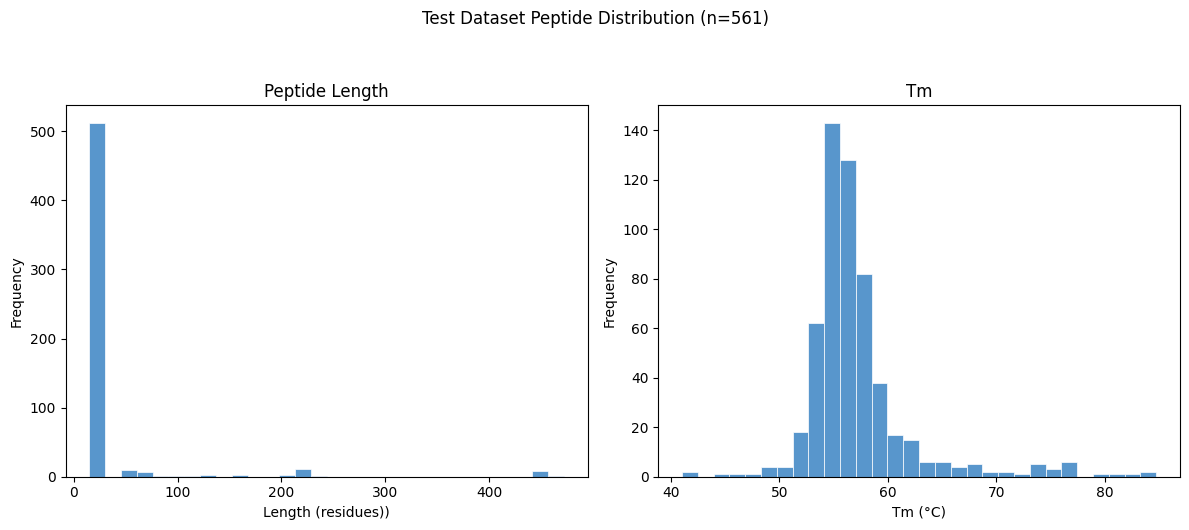

In [13]:
# Test Datatset
figure_counter = plot_peptide_distribution(filtered_test_df, dataset_name = "Test Dataset")

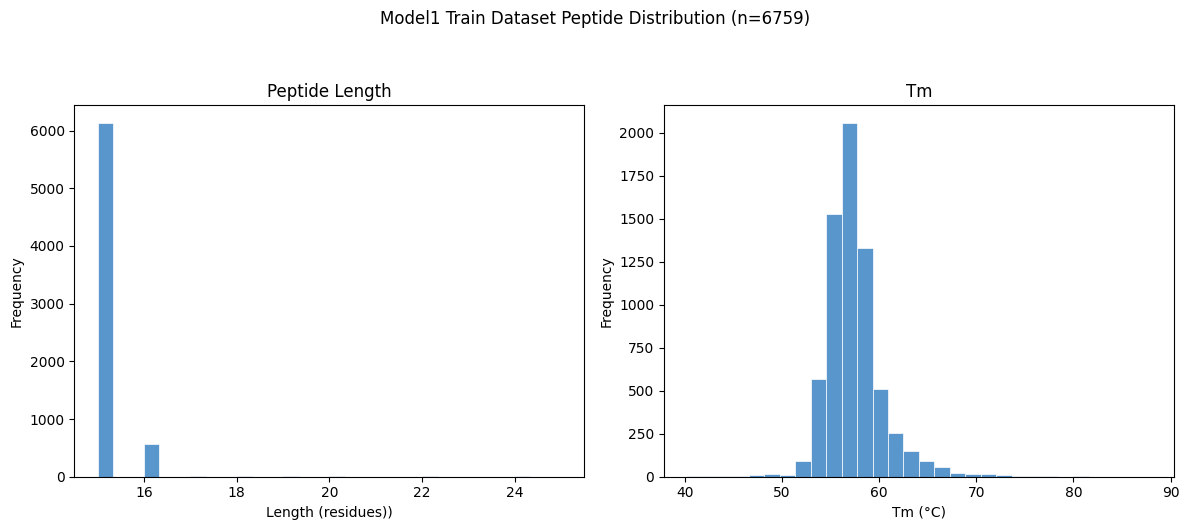

In [14]:
# Model1 Train Datatset
figure_counter = plot_peptide_distribution(Model1_train_df, dataset_name = "Model1 Train Dataset")

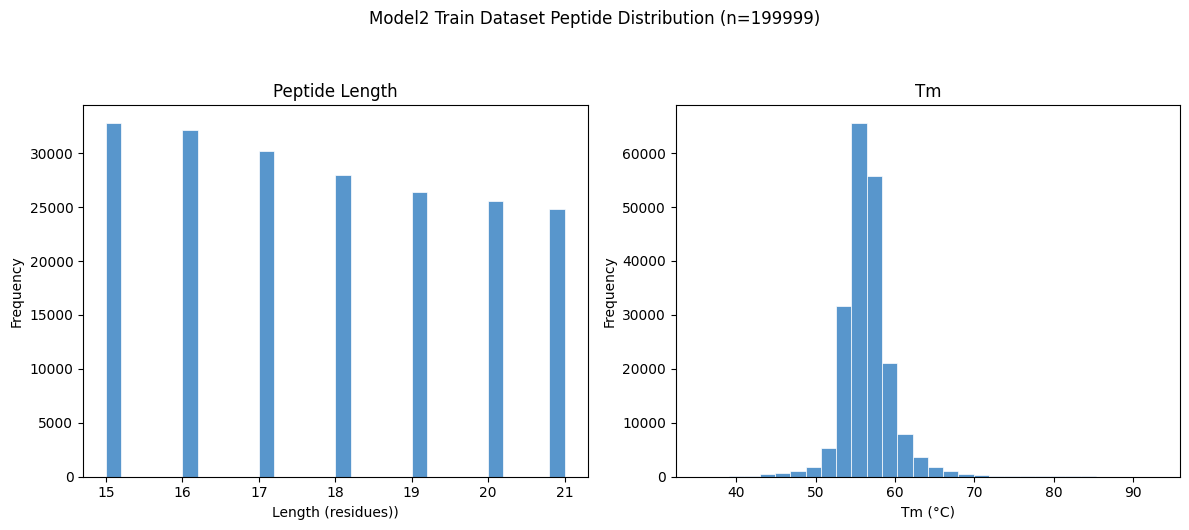

In [15]:
# Model2 Train Datatset
figure_counter = plot_peptide_distribution(Model2_train_df, dataset_name = "Model2 Train Dataset")

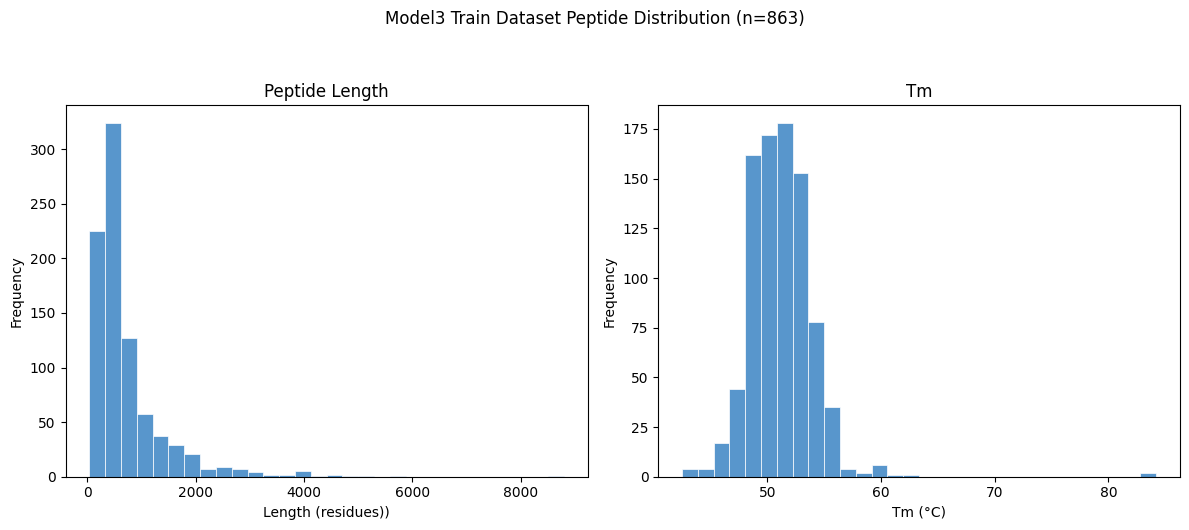

In [16]:
# Model3 Train Datatset
figure_counter = plot_peptide_distribution(Model3_train_df, dataset_name = "Model3 Train Dataset")

**Peptide Distribution In Terms of Peptide Length and Temperature Melting (Tm), with Axis Break for the Peptide Length Plot**

In [17]:
def plot_peptide_distribution_axis_break(input_df, dataset_name = "Test Dataset", save_figures=True):
    """
    Plots the length and Tm distribution for a given dataset. The length plot
    has an axis break.

    Args:
        input_df: DataFrame containing Length and Tm values
        dataset_name: Name of the dataset (default: "Test Dataset")
        save_figure: Whether to save the figure (default: True)

    Returns:
        int: The figure number that was used for this plot
    """
    global figure_counter
    fig = plt.figure(figsize=(12, 5))
    fig.suptitle(f"{dataset_name} Peptide Distribution with Axis Break (n={len(input_df['Length'])})", y=1.05)

    # Length distribution

    # Create GridSpec layout (1 row, 2 columns with custom widths)
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

    # Create nested GridSpec for broken axis
    gs_length = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[0],
                                           height_ratios=[1, 3], hspace=0.05)
    ax1_top = fig.add_subplot(gs_length[0])
    ax1_bottom = fig.add_subplot(gs_length[1], sharex=ax1_top)

    # Get bin counts using numpy (for accurate y-axis limits)
    counts, bins = np.histogram(input_df['Length'], bins=30)
    max_bin_count = counts.max()  # Maximum height of any bin

    # Plot same data on both axes
    sns.histplot(input_df['Length'], bins=bins, kde=False,
                color='#2073BC', edgecolor='white', ax=ax1_top)
    sns.histplot(input_df['Length'], bins=bins, kde=False,
            color='#2073BC', edgecolor='white', ax=ax1_bottom)

    # Configure axis break
    ax1_top.set_ylim(max_bin_count*0.6, max_bin_count*1.3)
    ax1_bottom.set_ylim(0, max_bin_count*0.2)

    # Hide spines between axes
    ax1_top.spines['bottom'].set_visible(False)
    ax1_bottom.spines['top'].set_visible(False)
    ax1_top.tick_params(bottom=False)

    # Add break marks
    d = 0.01
    kwargs = dict(transform=ax1_top.transAxes, color='k', clip_on=False)
    ax1_top.plot((-d, +d), (-d, +d), **kwargs)
    ax1_top.plot((1-d, 1+d), (-d, +d), **kwargs)

    kwargs.update(transform=ax1_bottom.transAxes)
    ax1_bottom.plot((-d, +d), (1-d, 1+d), **kwargs)
    ax1_bottom.plot((1-d, 1+d), (1-d, 1+d), **kwargs)

    # Set labels
    ax1_top.set_title('Peptide Length')
    ax1_bottom.set_xlabel('Length (residues)')
    ax1_bottom.set_ylabel('')  # Clear y-label for ax1
    ax1_top.set_ylabel('')  # Clear y-label for ax2
    fig.text(0.005, 0.5, 'Frequency', va='center', rotation='vertical')

    # Tm Distribution
    ax2 = plt.subplot(gs[1])
    sns.histplot(input_df['Tm'], bins=30, kde=False,
                 color='#2073BC', edgecolor='white', linewidth=0.5, ax=ax2)  # Adjust bins as necessary
    ax2.set_title(f"Tm")
    ax2.set_xlabel('Tm (°C)')
    ax2.set_ylabel('Frequency')

    figure_counter += 1
    if save_figures:
        plt.savefig(f"Figures/Figure{figure_counter}_{dataset_name.replace(' ', '_')}_Peptide_Distribution_w_Axis_Break.png", dpi=300, bbox_inches='tight')

    fig.tight_layout()
    fig.show()
    return figure_counter

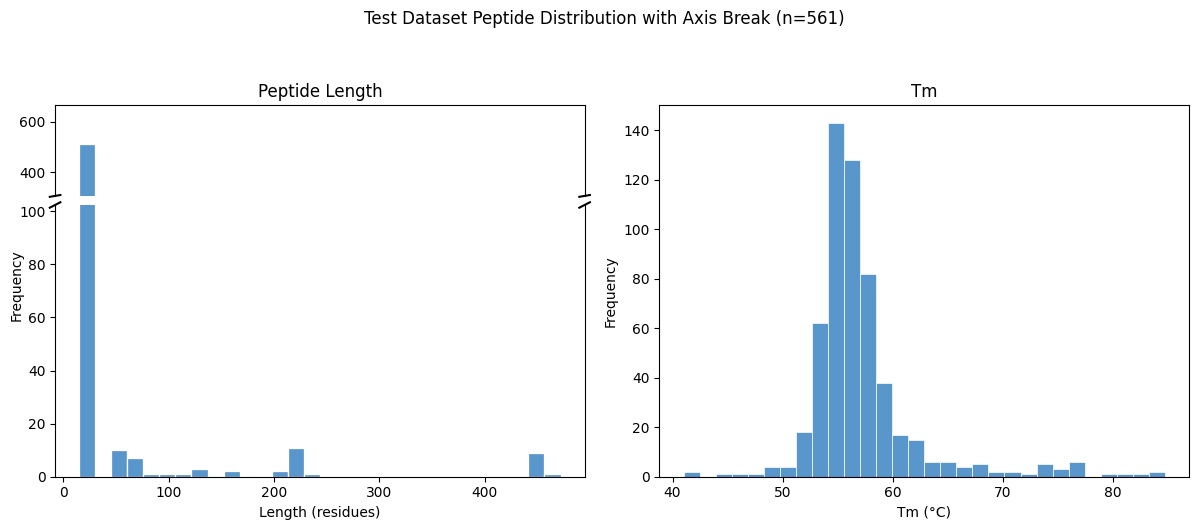

In [18]:
# Test Datatset
figure_counter = plot_peptide_distribution_axis_break(filtered_test_df, dataset_name = "Test Dataset")

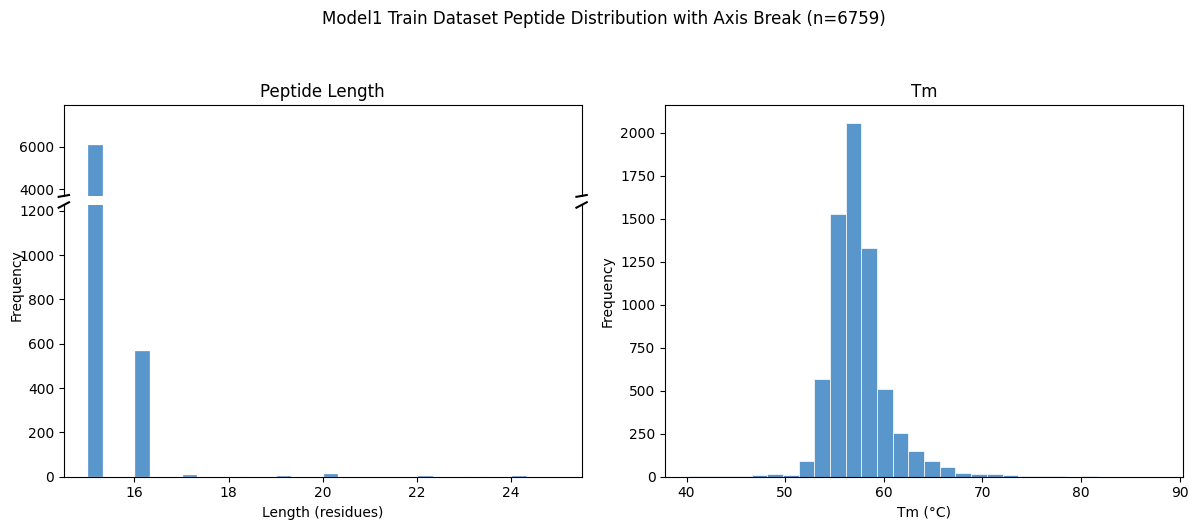

In [19]:
# Model1 Train Datatset
figure_counter = plot_peptide_distribution_axis_break(Model1_train_df, dataset_name = "Model1 Train Dataset")

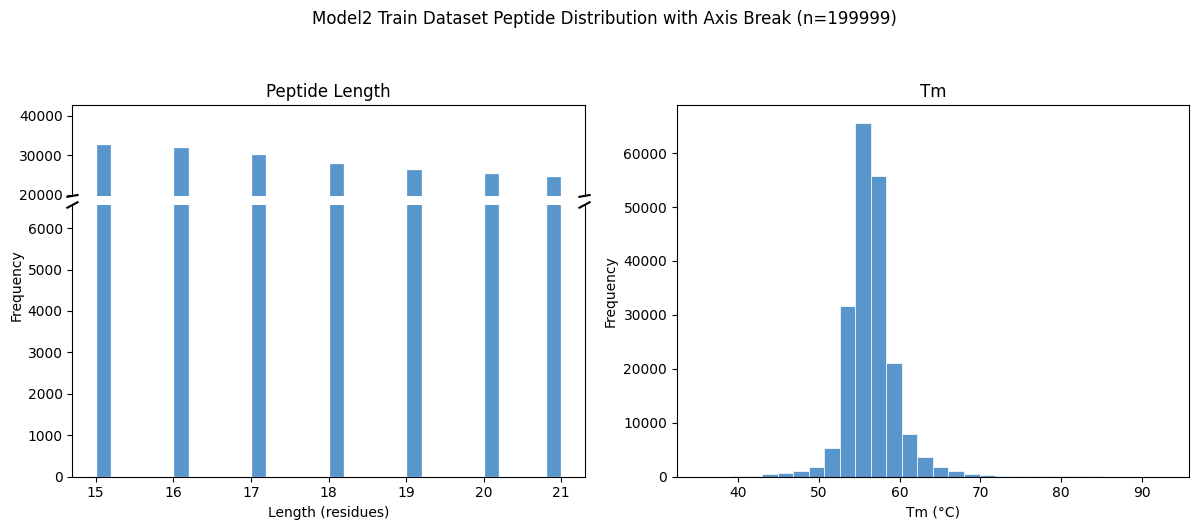

In [20]:
# Model2 Train Datatset
figure_counter = plot_peptide_distribution_axis_break(Model2_train_df, dataset_name = "Model2 Train Dataset")

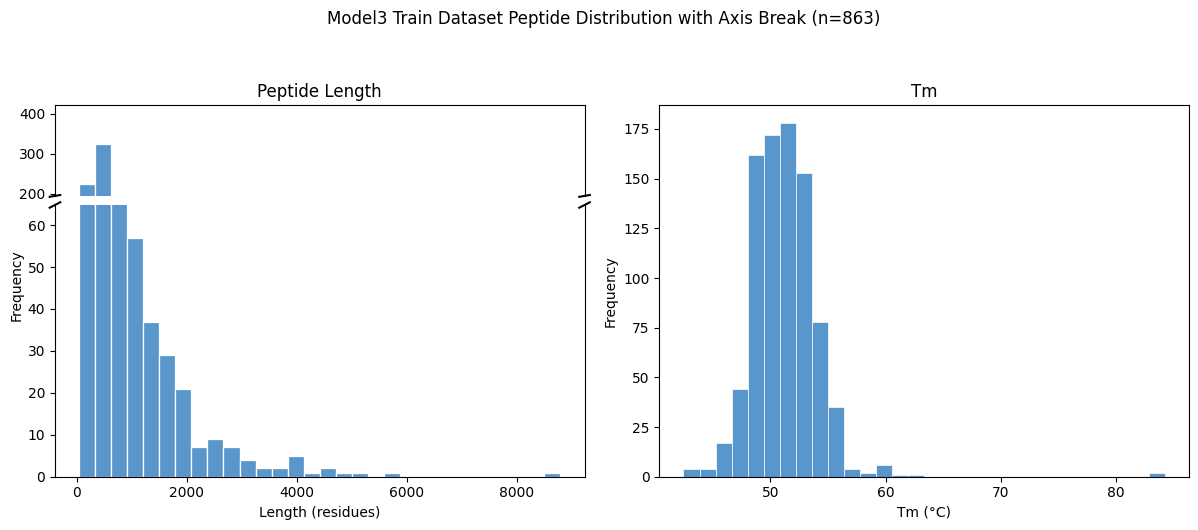

In [21]:
# Model3 Train Datatset
figure_counter = plot_peptide_distribution_axis_break(Model3_train_df, dataset_name = "Model3 Train Dataset")

**Visualize *De Novo* Proteins' Tm Distribution**

This is to specifically visualize the Tm distribution of *de novo* proteins (within the test dataset)

In [22]:
def visualize_de_novo_tm_distribution(input_df, dataset_name = "Test Dataset", save_figures=True):
    """
    Visualizes Tm distribution of de novo proteins as a strip plot with range indicator.

    Args:
        input_df: DataFrame containing Tm values
        dataset_name: Name of the dataset (default: "Test Dataset")
        save_figure: Whether to save the figure (default: True)

    Returns:
        int: The figure number that was used for this plot
    """
    global figure_counter

    # Extract de novo proteins from the dataset
    de_novo_proteins = input_df[input_df['Category'] == 'de novo, not tested in humans']

    # Create a figure for Tm distribution of de novo proteins
    plt.figure(figsize=(12, 2))

    # Create a strip plot to show the distribution of Tm temperatures
    plt.scatter(de_novo_proteins['Tm'], [1] * len(de_novo_proteins), alpha=0.6, color='#2073BC')  # Dots along a single Y value

    # Draw a horizontal line for the overall temperature range
    plt.hlines(1, de_novo_proteins['Tm'].min(), de_novo_proteins['Tm'].max(), colors='gray', linestyles='dashed')

    # Customize the plot
    plt.title(f'Temperature Range of De Novo Proteins in {dataset_name}')
    plt.xlabel('Tm (°C)')
    plt.yticks([])  # Remove Y ticks since they are not needed
    plt.xlim(de_novo_proteins['Tm'].min(), de_novo_proteins['Tm'].max())  # Set x-axis limits to the temperature range
    plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines for better readability
    plt.tight_layout()
    figure_counter += 1
    if save_figures:
        plt.savefig(f"Figures/Figure{figure_counter}_De_Novo_Proteins'_Tm_Distribution_in_{dataset_name.replace(' ','_')}.png", dpi=300, bbox_inches='tight')

    plt.show()
    return figure_counter

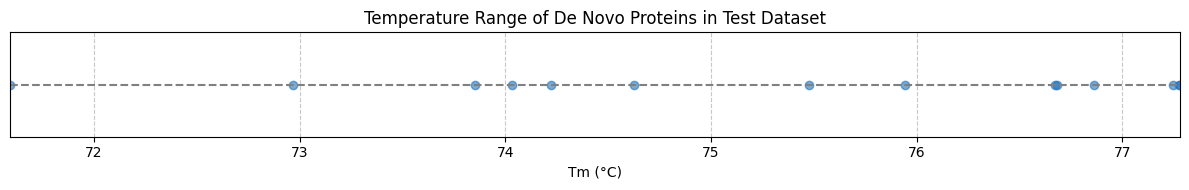

In [23]:
figure_counter = visualize_de_novo_tm_distribution(filtered_test_df, dataset_name = "Test Dataset")

**Normalized Tm distribution across models**

In [24]:
# Function to normalize frequency to 0–1
def normalize_frequency(data, bins=20):
    # Compute histogram
    hist, bin_edges = np.histogram(data, bins=bins)
    # Normalize histogram to 0–1
    hist_normalized = hist / hist.max()
    # Return bin centers and normalized frequencies
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    return bin_centers, hist_normalized

In [25]:
# Normalize frequency for each model
bin_centers1, hist_norm1 = normalize_frequency(Model1_train_df['Tm'])
bin_centers2, hist_norm2 = normalize_frequency(Model2_train_df['Tm'])
bin_centers3, hist_norm3 = normalize_frequency(Model3_train_df['Tm'])

In [31]:
def visualize_combined_tm_distributions(save_figures=True):
    """
      Visualizes normalized Tm distributions for three models as overlapping histograms.

      Args:
          save_figures: Whether to save the figure (default: True)

      Returns:
          int: The figure number that was used for this plot
    """
    global figure_counter

    plt.figure(figsize=(10, 6))

    # Plot histograms for each model (normalized) without black borders
    sns.histplot(Model1_train_df['Tm'], label='Model 1', color='#003366', kde=False, alpha=0.5, bins=20, stat='density', edgecolor='#003366')
    sns.histplot(Model2_train_df['Tm'], label='Model 2', color='#1f77b4', kde=False, alpha=0.5, bins=20, stat='density', edgecolor='#1f77b4')
    sns.histplot(Model3_train_df['Tm'], label='Model 3', color='#87CEEB', kde=False, alpha=0.5, bins=20, stat='density', edgecolor='#87CEEB')

    # Add labels and title
    plt.title('Normalized Tm Distributions Across Models', fontsize=16)
    plt.xlabel('Tm (°C)', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.legend(fontsize=12)

    figure_counter += 1
    if save_figures:
        plt.savefig(f"Figures/Figure{figure_counter}_Combined_Tm_Distribution.png", dpi=300, bbox_inches='tight')

    # Show plot
    plt.show()
    return figure_counter

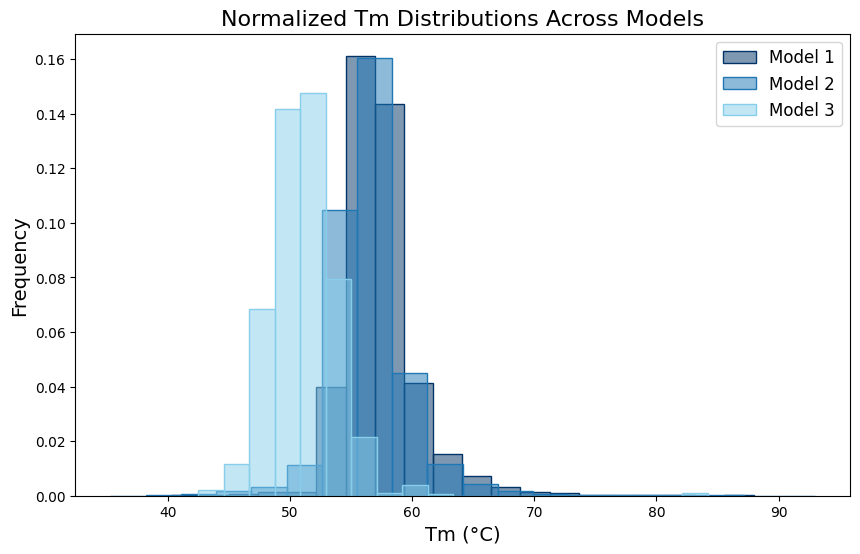

In [32]:
figure_counter = visualize_combined_tm_distributions()

**Section 3. Model Similarity via Euclidean Distance**

In [55]:
from sklearn.preprocessing import StandardScaler

In [57]:
def compute_pairwise_distances(train_df, test_df, column_names=['Length', 'Tm'], model_number=1, save_figures=True, highlight_de_novo=True):
    """
    Computes Euclidean distance between test and train data for two features,
    with equal weighting (1:1) after standardization.

    Args:
        train_df (pd.DataFrame): Training data
        test_df (pd.DataFrame): Test data
        column_names (list): Features to include (default: ['Length', 'Tm'])
        model_number: Identifier for the model being evaluated (default: 1)
        save_figures: Whether to save visualization to 'Figures' subfolder (default: True)
        highlight_de_novo: Whether to highlight de novo peptides (default: True)

    Returns:
        tuple: (combined_distances, figure_counter) containing:
            - combined_distances: Array of combined Euclidean distances (shape: len(test_df))
            - figure_counter: Updated global figure counter after creating this figure
    """
    global figure_counter

    # Standardize features (mean=0, std=1) to ensure 1:1 weighting
    scaler = StandardScaler().fit(test_df[column_names])
    train_scaled = scaler.transform(train_df[column_names])
    test_scaled = scaler.transform(test_df[column_names])

    # Compute Euclidean distance for each test point vs. all train points
    distances = np.zeros((len(test_df), len(column_names)))
    combined_distances = np.zeros(len(test_df))

    for j, feature in enumerate(column_names):
        for i, test_point in enumerate(test_scaled):
            distances[i,j] = np.linalg.norm(train_scaled[:,j] - test_point[j])

    combined_distances = np.linalg.norm(distances, axis=1)/ np.sqrt(len(train_df))

    plt.figure(figsize=(10, 6))
    # Plot Model {model_number} training data
    plt.scatter(
        train_scaled[:, 0], train_scaled[:, 1],
        c='blue', label=f'Model {model_number} (Train)', alpha=0.7, s=100
    )

    # Plot test data (colored by distance to Model {model_number})
    if highlight_de_novo:
        de_novo_mask = test_df['Immunogenic Score'].isna()

        scatter = plt.scatter(
            test_scaled[~de_novo_mask, 0], test_scaled[~de_novo_mask, 1],
            c=combined_distances[~de_novo_mask], cmap='Reds',
            label='Test Data (Control)', s=100, edgecolor='black'
        )

                # Highlight de novo peptides with star markers
        plt.scatter(
            test_scaled[de_novo_mask, 0], test_scaled[de_novo_mask, 1],
            c=combined_distances[de_novo_mask], cmap='Reds',
            marker='*', s=200, edgecolor='black', linewidth=1.5,
            label='Test Data (De Novo)'
        )
    else:
        scatter = plt.scatter(
            test_scaled[:, 0], test_scaled[:, 1],
            c=combined_distances, cmap='Reds',
            label='Test Data', s=100, edgecolor='black'
        )

    # Add colorbar for distances
    plt.colorbar(scatter, label=f'Distance to Model {model_number}')

    # Customize plot
    plt.xlabel('Length (Standardized)')
    plt.ylabel('Tm (Standardized)')
    plt.title(f'Similarity of Test Data vs. Model {model_number} (n={len(train_df)})')
    plt.legend()
    figure_counter += 1

    if save_figures:
        plt.savefig(f"Figures/Figure{figure_counter}_Similarity_of_Test_Dataset_vs_Model_{model_number}.png", dpi=300, bbox_inches='tight')

    plt.show()

    return combined_distances, figure_counter

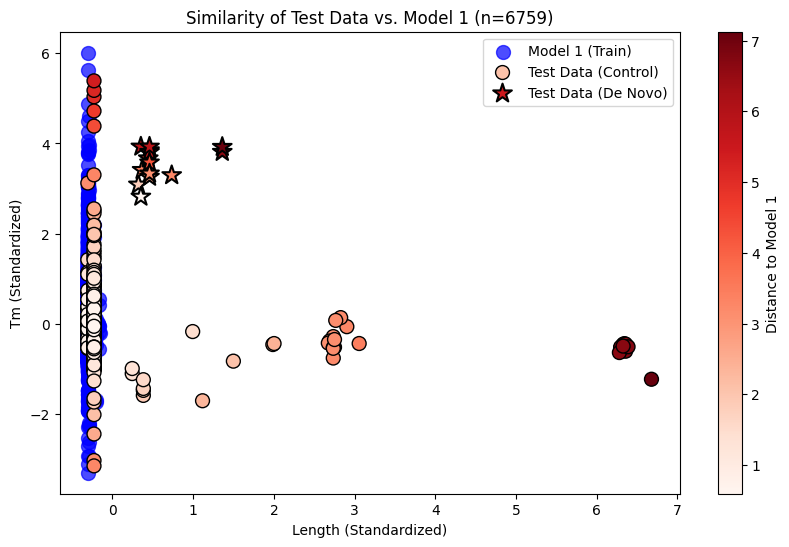

In [52]:
combined_distances_Model1, figure_counter = compute_pairwise_distances(Model1_train_df, filtered_test_df)

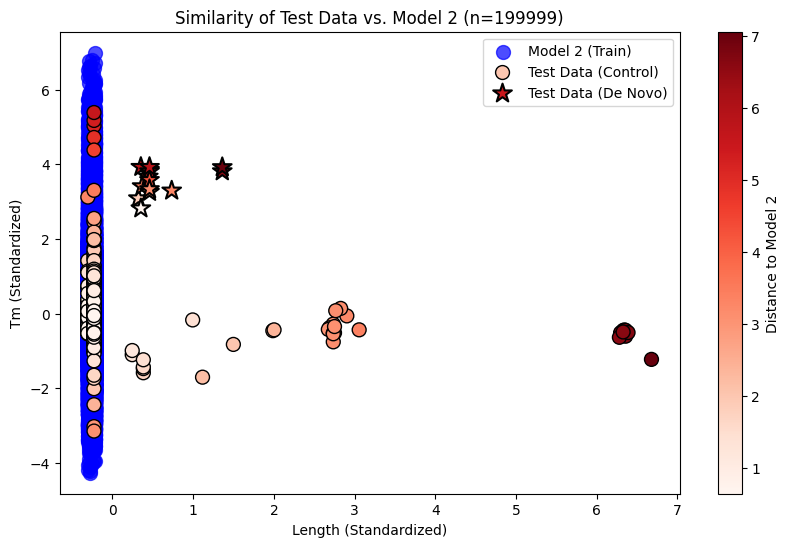

In [58]:
combined_distances_Model2, figure_counter = compute_pairwise_distances(Model2_train_df, filtered_test_df, model_number=2)

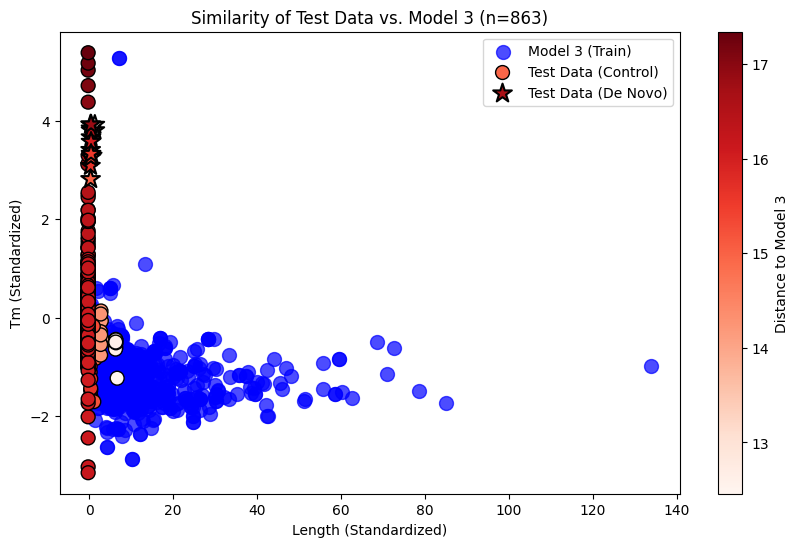

In [59]:
combined_distances_Model3, figure_counter = compute_pairwise_distances(Model3_train_df, filtered_test_df, model_number=3)

**Section 4. Run Models**

In [33]:
import textwrap
import re

**Before Running Immunogenicity Prediction Model (Model 1 & Model 2), Break Test Set Into Input Files of Bataches of Sequences**

The number of sequences in each batch depends on the input capacity of different models.

In [34]:
def process_peptide_batches(input_pep_list, batch_size=100, output_subfolder="Data", model_number=1):
    """
    Processes peptide list in batches of 100, saving each batch to a numbered file.
    Continues until all sequences are processed.

    Args:
        input_pep_list (list): List of peptide sequences to process
        batch_size (int): Number of sequences per batch (default: 100)
        output_subfolder (str): Subfolder to save batch files (default: "Data")
        model_number (int): Model identifier to include in filenames (default: 1)

    Returns:
        int: Total number of batch files created
    """
    batch_number = 1
    remaining_peptides = input_pep_list.copy()

    if len(remaining_peptides) < batch_size:
        batch_size = len(remaining_peptides)

    if model_number == 1:
        while len(remaining_peptides) > 0:
            # Take up to 100 peptides
            current_batch = remaining_peptides[:batch_size]
            remaining_peptides = remaining_peptides[batch_size:]

            # Create filename with batch number
            filename = f"Model{model_number}_peptide_batch_{batch_number}.txt"
            output_path = os.path.join(base_path, output_subfolder, filename)

            # Save to file
            with open(output_path, 'w') as f:
                f.write('\n'.join(current_batch))

            batch_number += 1
    elif model_number == 2 or model_number == 3:
        while len(remaining_peptides) > 0:
            # Take up to batch_size peptides
            current_batch = remaining_peptides[:batch_size]
            remaining_peptides = remaining_peptides[batch_size:]

            # Create filename with batch number
            filename = f"Model{model_number}_peptide_batch_{batch_number}.fasta"  # Changed to .fasta
            output_path = os.path.join(base_path, output_subfolder, filename)

            # Write in FASTA format with 80-character line wrapping
            with open(output_path, 'w') as f:
                for i, seq in enumerate(current_batch, 1):
                    # FASTA header (unique identifier for each sequence)
                    f.write(f">Model{model_number}_Batch{batch_number}_Seq{i}\n")

                    # Sequence with 80-character line wrapping
                    wrapped_seq = textwrap.fill(seq, width=60)
                    f.write(f"{wrapped_seq}\n")  # Extra newline between entries
            batch_number += 1

    return batch_number - 1

In [35]:
# Calculate Immunogenicity Prediction Score for Test Set (Model 1)
batch_number_1 = process_peptide_batches(filtered_test_pep_list, batch_size=100) # total number of files

In [36]:
# Calculate Immunogenicity Prediction Score for Test Set (Model 2)
batch_number_2 = process_peptide_batches(filtered_test_pep_list, batch_size=1000, model_number=2)# total number of files
# Each batch via model 2 prediction should undergo recognition by subtype DR, DQ, and DP MHCII molecules

In [37]:
# Calculate Immunogenicity Prediction Score for Test Set (Model 3)
batch_number_3 = process_peptide_batches(filtered_test_pep_list, batch_size=1000, model_number=3)# total number of files
# Each batch via model 3 prediction should undergo recognition by subtype A, B, C MHCI molecules

**Clean Model1 Prediction Scores for Test Set**

In [38]:
def process_model_prediction(base_filename="CD4_Prediction", total_length=len(filtered_test_pep_list), subfolder="Data", model_number=1, batch_number = batch_number_1):
    """
    Processes CD4_Prediction files to obtain a binary immunogenicity list.

    Args:
        base_filename (str): Base filename (e.g., "CD4_Prediction")
        total_length (int): Total length of the output list (561 by default)
        subfolder (str): Subfolder containing prediction files (default: "Data")
        model_number (int): Model identifier to include in filenames (default: 1)
        batch_number (int): Total number of batch files to process (default: batch_number_1)

    Returns:
        list: Binary list where 1 = immunogenic, 0 = non-immunogenic
    """
    # Initialize all positions as 0 (non-immunogenic)
    immunogenicity = [0] * total_length

    if model_number == 1:
        # Process files 1 through the total number of files
        for file_num in range(1, batch_number + 1):
            filename = f"{base_filename}_{file_num}.csv"
            read_file_path = os.path.join(base_path, subfolder, filename)

            # Read the CSV file
            df = pd.read_csv(read_file_path)

            # Get protein numbers (assuming they're in a column named 'protein_number')
            protein_numbers = df['Protein Number'].unique()  # Remove duplicates

            # Adjust numbering for files > 1
            if file_num > 1:
                protein_numbers = [(num + (file_num - 1) * 100) for num in protein_numbers]

            # Mark these positions as immunogenic (1)
            for num in protein_numbers:
                if 1 <= num <= total_length:
                    immunogenicity[num - 1] = 1  # -1 because Python is 0-indexed
    elif model_number == 2:
        # Get all netMHCIIpan files in directory
        file_list = [f for f in os.listdir(os.path.join(base_path, subfolder))
                if base_filename in f and f.endswith('.xls')]

        for filename in file_list:
            file_path = os.path.join(base_path, subfolder, filename)

            df = pd.read_csv(file_path, sep='\t', skiprows=1, header=0)
            pos_counter = 0

            for _, row in df.iterrows():
                # Count the sequence ID in the test set
                if row['Pos'] == 1:
                    pos_counter += 1
                if row['NB'] != 0:
                    immunogenicity[pos_counter - 1] = 1
    elif model_number == 3:
        # Get all model3 prediction output files in directory
        file_list = [f for f in os.listdir(os.path.join(base_path, subfolder))
                if base_filename in f and f.endswith('.txt')]

        for filename in file_list:
            path = os.path.join(base_path, subfolder, filename)

            with open(path, "r") as file:
                text = file.read()
            blocks = re.split(r'-{5,}', text)  # Split by 5+ dashes

            pos_counter = 0

            for block in blocks:
            # Check if "Number of MHC ligands X identified" exists in the block
                match = re.search(r"Number of MHC ligands (\d+) identified", block)
                if match:
                    pos_counter += 1
                    num_ligands = int(match.group(1))
                    if num_ligands > 0:
                        immunogenicity[pos_counter - 1] = 1

    # Add the new column
    filtered_test_df[f"Model{model_number}"] = immunogenicity

    # output_filename = "Immunogenicity_Predicted_Sequences.xlsx"
    # output_path = os.path.join(base_path, subfolder, output_filename)
    # filtered_test_df.to_excel(output_path, index=False)

    return immunogenicity

In [39]:
immunogenicity_lst_model1 = process_model_prediction()

In [40]:
immunogenicity_lst_model2 = process_model_prediction(base_filename="NetMHCIIpan", model_number=2, batch_number=batch_number_2)

In [41]:
immunogenicity_lst_model3 = process_model_prediction(base_filename="Model3_", model_number=3, batch_number=batch_number_3)

In [ ]:
# count_ones_1 = (filtered_test_df['Model1'] == 1).sum()
# count_ones_2 = (filtered_test_df['Model2'] == 1).sum()
# count_ones_3 = (filtered_test_df['Model3'] == 1).sum()

# print(count_ones_1)
# print(count_ones_2)
# print(count_ones_3)

444
512
537


**Run Model4 (consensus of Models 1-3)**

In [60]:
def create_ensemble_predictions(filtered_test_df, dist1, dist2, dist3, model_pred_cols=['Model1','Model2','Model3']):
    """
    Creates ensemble predictions by selecting the model with minimum distance for each test point.

    Args:
        filtered_test_df: DataFrame containing test data
        dist1: Distance array for Model 1
        dist2: Distance array for Model 2
        dist3: Distance array for Model 3
        model_pred_cols: List of column names containing model predictions

    Returns:
        Tuple of (ensemble_y_pred, selected_models)
    """
    # Stack all distance arrays
    all_distances = np.column_stack([dist1, dist2, dist3])

    # Find which model has minimum distance for each test point
    selected_models = np.argmin(all_distances, axis=1) + 1  # +1 to match model numbers

    # Create ensemble predictions using the closest model's prediction
    ensemble_y_pred = np.zeros(len(filtered_test_df))
    for i, model_num in enumerate(selected_models):
        ensemble_y_pred[i] = filtered_test_df.iloc[i][model_pred_cols[model_num-1]]

    return ensemble_y_pred, selected_models

In [61]:
ensemble_y_pred, selected_models = create_ensemble_predictions(
    filtered_test_df,
    combined_distances_Model1,
    combined_distances_Model2,
    combined_distances_Model3
)

**Section 4. Model Performance**

In [62]:
from sklearn.metrics import balanced_accuracy_score, f1_score, confusion_matrix

**Quantify Model1 Performance on Controls**

In [63]:
# Global storage for metrics and confusion matrices
all_metrics = {}
all_confusion_matrices = {}

def immunogenicity_model_metrics(y_true, y_pred, model_number=1):
    """
    Generates and visualizes key performance metrics and confusion matrix for
    an immunogenicity prediction model. These will be stored for later combined
    plotting.

    Args:
        y_true (array-like): Ground truth (correct) target values (0=non-immunogenic, 1=immunogenic)
        y_pred (array-like): Estimated targets as returned by a classifier
        model_number (int): Identifier for the model being evaluated (default: 1)

    Returns:
        None
    """
    global all_metrics, all_confusion_matrices

    # Calculate metrics
    metrics = {
        'Balanced Accuracy': balanced_accuracy_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred)}

    all_metrics[model_number] = metrics


    cm = confusion_matrix(y_true, y_pred)
    all_confusion_matrices[model_number] = cm

    return None

In [64]:
# Model 1
non_na_idx = filtered_test_df["Immunogenic Score"].notna()
y_true = filtered_test_df.loc[non_na_idx, "Immunogenic Score"]
y_pred = filtered_test_df.loc[non_na_idx, "Model1"]
immunogenicity_model_metrics(y_true, y_pred, model_number=1)

# Model 2
y_pred_2 = filtered_test_df.loc[non_na_idx, "Model2"]
immunogenicity_model_metrics(y_true, y_pred_2, model_number=2)

# Model 3
y_pred_3 = filtered_test_df.loc[non_na_idx, "Model3"]
immunogenicity_model_metrics(y_true, y_pred_3, model_number=3)

# Model 4
y_pred_4 = ensemble_y_pred[non_na_idx]
immunogenicity_model_metrics(y_true, y_pred_4, model_number=4)

In [65]:
def plot_combined_metrics(save_figures=True):
    """
    Generates a single bar plot comparing all models' metrics.
    Two figures are produced:
              - Figure 1: Bar plot of balanced accuracy and F1-score
              - Figure 2: Confusion matrix visualization

    Args:
        save_figures (bool): Whether to save figures to 'Figures' subfolder (default: True)

    Returns:
        int: The global figure counter after creating figures (for maintaining sequential numbering)
    """
    global figure_counter, all_metrics, all_confusion_matrices

    # Metric barplot
    fig1, ax1 = plt.subplots(figsize=(8, 5))
    bar_width = 0.2
    colors = ['#005073', '#107dac', '#189ad3','#1ebbd7']

    model_numbers = sorted(all_metrics.keys())
    metrics = list(all_metrics[model_numbers[0]].keys())

    n_models = len(model_numbers)
    x = np.arange(len(metrics))

    for i, model_num in enumerate(model_numbers):
        values = [all_metrics[model_num][m] for m in metrics]
        bars = ax1.bar(
            x + i * bar_width,
            values,
            width=bar_width,
            color=colors[i],
            label=f'Model {model_num}'
        )
        # Add value labels
        for bar in bars:
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2, height,
                    f'{height:.3f}',
                    ha='center', va='bottom', fontsize=10)

    ax1.set_xticks(x + (n_models - 1) * bar_width / 2)
    ax1.set_xticklabels(metrics, fontsize=12)
    ax1.set_ylabel('Score', fontsize=12)
    ax1.set_title(f'Model Performance Comparison (n={len(y_true)})', pad=20, fontsize=14)
    ax1.legend()
    sns.despine()
    fig1.tight_layout()

    figure_counter += 1
    if save_figures:
        fig1.savefig(f"Figures/Figure{figure_counter}_Combined_Metrics.png", dpi=300, bbox_inches='tight')

    fig1.show()

    # Create confusion matrix with annotations
    model_numbers = sorted(all_confusion_matrices.keys())
    n_models = len(model_numbers)

    fig2, ax2 = plt.subplots(1, n_models, figsize=(5 * n_models, 4))

    if n_models == 1:  # Handle single subplot case
        ax2 = [ax2]

    for ax, model_num in zip(ax2, model_numbers):
        cm = all_confusion_matrices[model_num]
        sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd', ax=ax,
                    xticklabels=['Pred Non-Imm', 'Pred Imm'],
                    yticklabels=['True Non-Imm', 'True Imm'])
        ax.set_title(f"Model {model_num} (n={np.sum(cm)})", pad=15, fontsize=12)

    fig2.suptitle("Confusion Matrices Comparison", y=1.02, fontsize=14)
    fig2.tight_layout()

    figure_counter += 1
    if save_figures:
        fig2.savefig(f"Figures/Figure{figure_counter}_Combined_Confusion_Matrices.png", dpi=300, bbox_inches='tight')
    fig2.show()

    return figure_counter

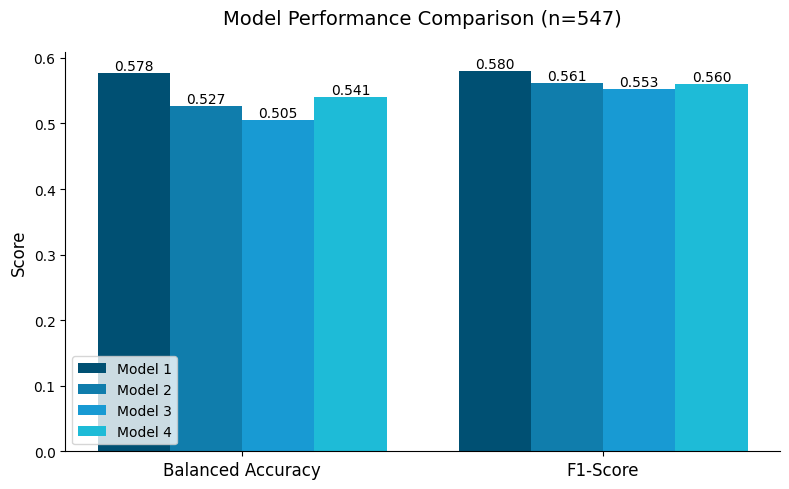

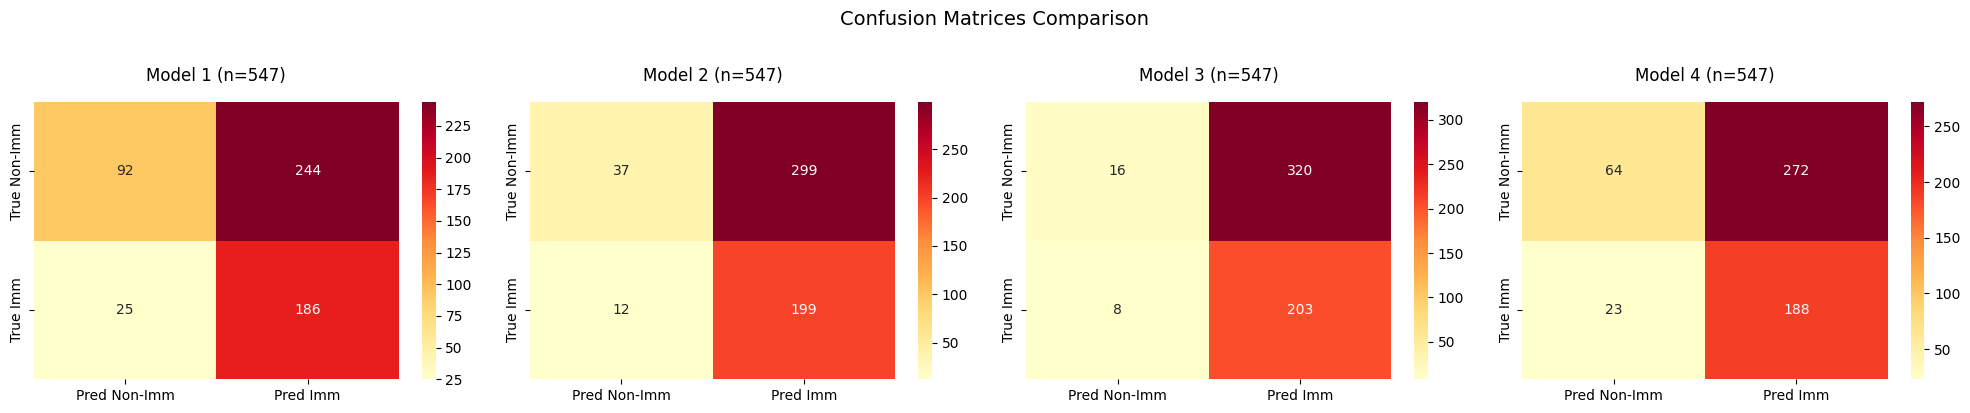

In [66]:
figure_counter = plot_combined_metrics()

**Quantify Model1 Prediction on *De Novo* Proteins**

In [67]:
# Global storage for de novo predictions
de_novo_prediction_counts = {}

def de_novo_protein_predictions(input_df, model_name="Model1"):
    """
    Generates a bar plot of immunogenicity predictions for de novo proteins.
    This will be stored for later combined plotting.

    Args:
        input_df: DataFrame containing prediction results with columns:
                    - 'Immunogenic Score' (NA for de novo proteins)
                    - 'Model1' (prediction values 0/1)
        model_name: Name of the model to display in title (default: "Model 1")

    Returns:
        y_vals(numpy.ndarray): Array of prediction values (0s and 1s) for de novo proteins
                               from the specified model.
    """
    global de_novo_prediction_counts

    na_idx = input_df['Immunogenic Score'].isna()
    y_vals = input_df.loc[na_idx, model_name]

    pred_counts = {
        'Non-Immunogenic': (y_vals == 0).sum(),
        'Immunogenic': (y_vals == 1).sum()
    }

    de_novo_prediction_counts[model_name] = pred_counts

    return y_vals

In [68]:
y_vals = de_novo_protein_predictions(filtered_test_df, model_name="Model1")
y_vals = de_novo_protein_predictions(filtered_test_df, model_name="Model2")
y_vals = de_novo_protein_predictions(filtered_test_df, model_name="Model3")

filtered_test_df[f"Model{4}"] = ensemble_y_pred
y_vals = de_novo_protein_predictions(filtered_test_df, model_name="Model4")

In [69]:
def plot_combined_de_novo_predictions(save_figures=True):
    """
    Generates a single grouped bar plot comparing predictions from all stored models.

    Args:
        save_figures (bool): Whether to save figures to 'Figures' subfolder (default: True)

    Returns:
        int: The global figure counter after creating figures (for maintaining sequential numbering)
    """
    global de_novo_prediction_counts, figure_counter, y_vals

    fig, ax = plt.subplots(figsize=(8, 5))
    bar_width = 0.2
    model_colors = ['#005073', '#107dac', '#189ad3','#1ebbd7']

    model_names = sorted(de_novo_prediction_counts.keys())
    n_models = len(model_names)

    categories = ['Non-Immunogenic', 'Immunogenic']
    x = np.arange(len(categories))  # x positions for categories

    for i, model in enumerate(model_names):
        counts = [de_novo_prediction_counts[model][cat] for cat in categories]
        bars = ax.bar(
            x + i * bar_width,
            counts,
            width=bar_width,
            color=model_colors[i],
            label=model
        )
        # Add count labels
        for bar, count in zip(bars, counts):
            ax.text(bar.get_x() + bar.get_width()/2,
                    bar.get_height(),
                    f'{count}',
                    ha='center',
                    va='bottom',
                    fontsize=10)

    ax.set_xticks(x + (n_models - 1) * bar_width / 2)
    ax.set_xticklabels(categories, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title(f'De Novo Protein Predictions Across Models (n={len(y_vals)})', pad=20, fontsize=14)
    ax.legend(title='Model', fontsize=10)
    plt.setp(ax.get_xticklabels(), rotation=15, ha='right')
    sns.despine()
    fig.tight_layout()

    figure_counter += 1
    if save_figures:
        fig.savefig(f"Figures/Figure{figure_counter}_Combined_De_Novo_Predictions.png", dpi=300, bbox_inches='tight')
    plt.show()

    return figure_counter

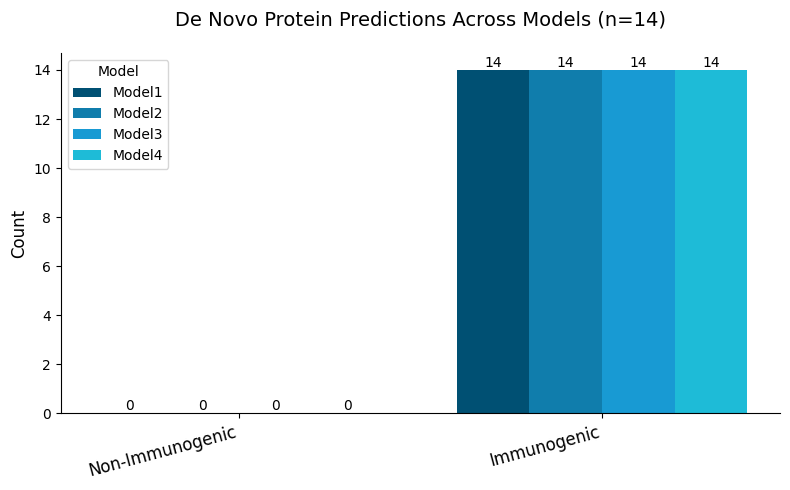

In [70]:
figure_counter = plot_combined_de_novo_predictions(save_figures=True)

**Optional: Visualize where false predictions are**

In [71]:
# def analyze_false_predictions(y_true, y_pred, test_df, combined_distances, model_number=1):
#     """
#     Analyzes false predictions in relation to feature-space distances from training data.

#     Args:
#         y_true (array): Ground truth labels
#         y_pred (array): Model predictions
#         test_df (pd.DataFrame): Test dataset containing features
#         combined_distances (array): Precomputed distances from training data
#         model_number (int): Model identifier

#     Returns:
#         pd.DataFrame: Enhanced test_df with FP analysis columns
#     """
#     # Create FP/FP masks
#     false_positives = (y_pred == 1) & (y_true == 0)
#     false_negatives = (y_pred == 0) & (y_true == 1)

#     valid_mask = ~(np.isnan(y_true) | np.isnan(y_pred))

#     # Add analysis columns to test_df
#     test_df = test_df.copy()
#     test_df[f'Model{model_number}_FP'] = false_positives
#     test_df[f'Model{model_number}_FN'] = false_negatives
#     test_df[f'Model{model_number}_Distance'] = combined_distances

#     return test_df

In [72]:
# def plot_fp_analysis(train_df, test_df, model_number=1, save_figures=False):
#     """
#     Visualizes false predictions in feature space.
#     """
#     global figure_counter

#     plt.figure(figsize=(10, 6))

#     # Plot training data
#     plt.scatter(
#         train_df['Length'], train_df['Tm'],
#         c='blue', alpha=0.3, label='Training Data'
#     )

#     # Plot test data - color by error type
#     fp_mask = test_df[f'Model{model_number}_FP']
#     fn_mask = test_df[f'Model{model_number}_FN']
#     correct_mask = ~(fp_mask | fn_mask)

#     plt.scatter(
#         test_df.loc[correct_mask, 'Length'],
#         test_df.loc[correct_mask, 'Tm'],
#         c='green', label='Correct Predictions'
#     )

#     plt.scatter(
#         test_df.loc[fp_mask, 'Length'],
#         test_df.loc[fp_mask, 'Tm'],
#         c='red', label='False Positives'
#     )

#     plt.scatter(
#         test_df.loc[fn_mask, 'Length'],
#         test_df.loc[fn_mask, 'Tm'],
#         c='orange', label='False Negatives'
#     )

#     plt.xlabel('Length')
#     plt.ylabel('Tm')
#     plt.title(f'Model {model_number} False Predictions in Feature Space')
#     plt.legend()

#     figure_counter += 1
#     if save_figures:
#         plt.savefig(f"Figures/Figure{figure_counter}_FP_Analysis_Model_{model_number}.png",
#                    dpi=300, bbox_inches='tight')
#     plt.show()

In [73]:
# control_only_test_df = filtered_test_df.dropna(subset=["Immunogenic Score"]).copy()

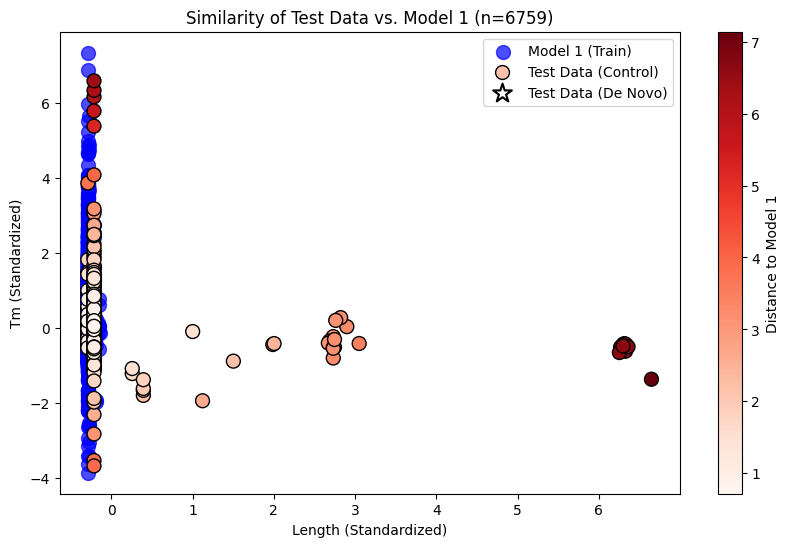

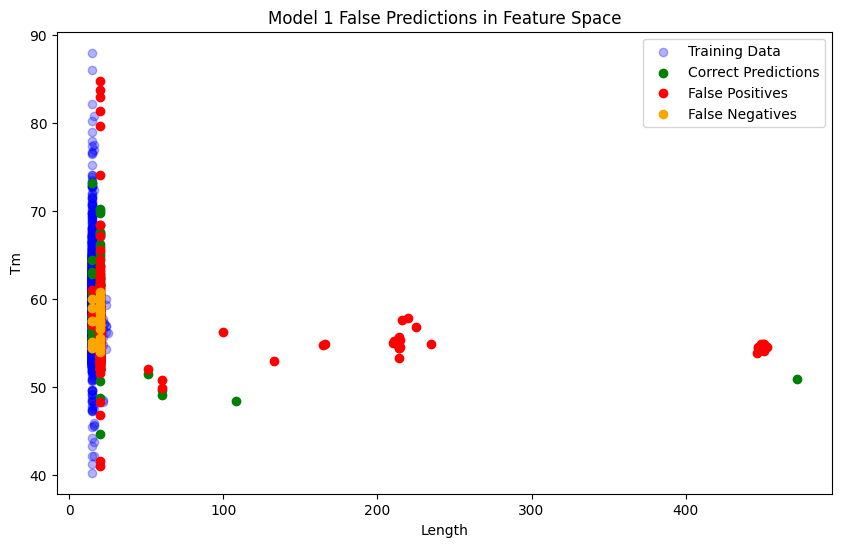

In [74]:
# # For Model 1
# combined_distances_Model1_control_only, figure_counter = compute_pairwise_distances(Model1_train_df, control_only_test_df, save_figures=False)
# test_df_enhanced = analyze_false_predictions(
#     y_true, y_pred, control_only_test_df, combined_distances_Model1_control_only, model_number=1
# )
# plot_fp_analysis(Model1_train_df, test_df_enhanced, model_number=1)

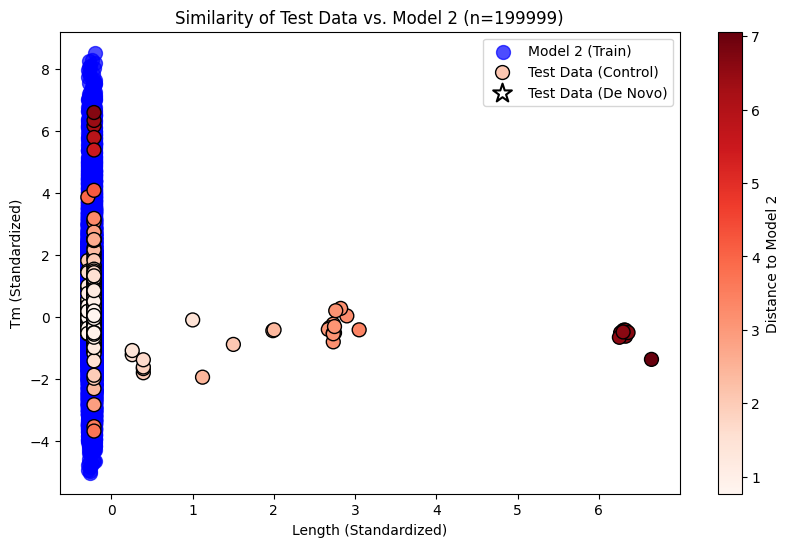

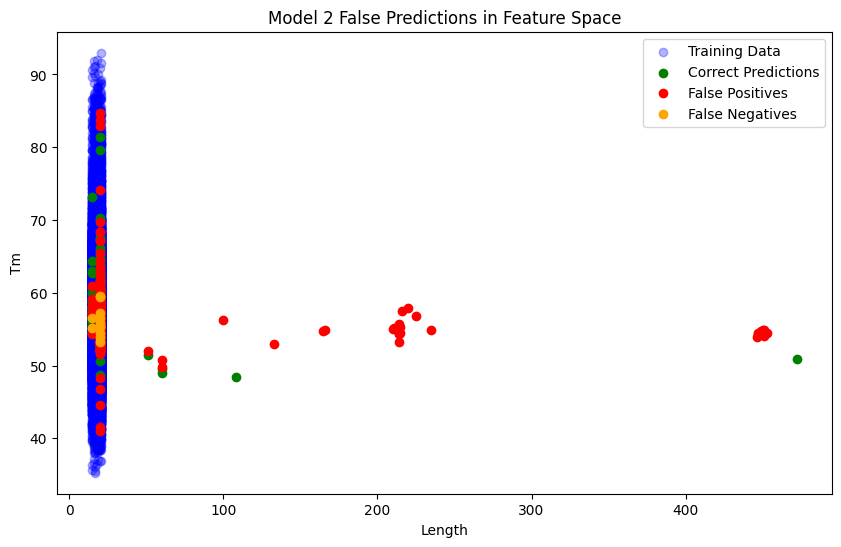

In [76]:
# # For Model 2
# combined_distances_Model2_control_only, figure_counter = compute_pairwise_distances(Model2_train_df, control_only_test_df,model_number=2,save_figures=False)
# test_df_enhanced_2 = analyze_false_predictions(
#     y_true, y_pred_2, control_only_test_df, combined_distances_Model2_control_only, model_number=2
# )
# plot_fp_analysis(Model2_train_df, test_df_enhanced_2, model_number=2)

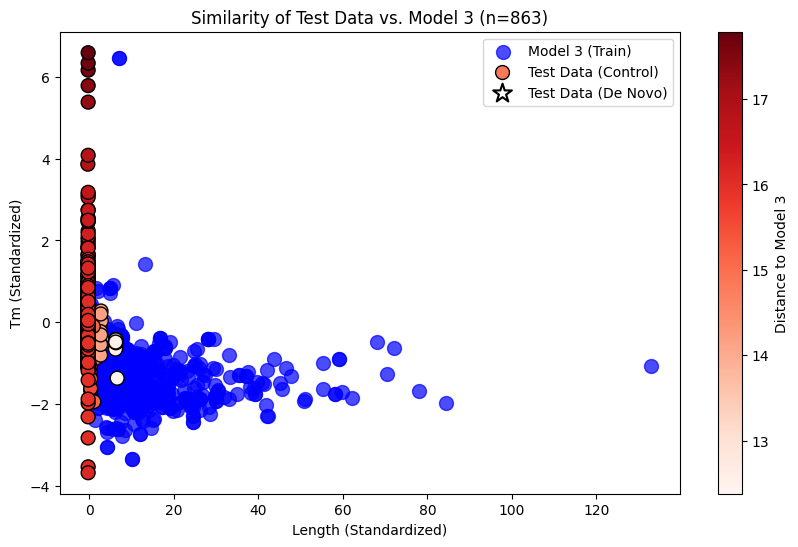

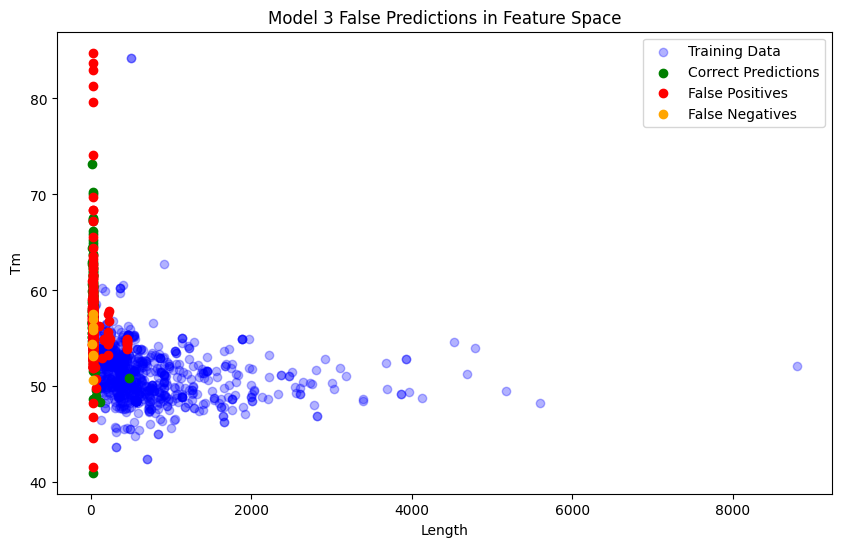

In [77]:
# # For Model 3
# combined_distances_Model3_control_only, figure_counter = compute_pairwise_distances(Model3_train_df, control_only_test_df,model_number=3,save_figures=False)
# test_df_enhanced_3 = analyze_false_predictions(
#     y_true, y_pred_3, control_only_test_df, combined_distances_Model3_control_only, model_number=3
# )
# plot_fp_analysis(Model3_train_df, test_df_enhanced_3, model_number=3)